In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('/Users/ikjuncho/Documents/Declining Fertility Rates/oecd_fertility_rates.csv')

In [12]:
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,DEU,FERTILITY,TOT,CHD_WOMAN,A,1970,2.03,NaN
1,DEU,FERTILITY,TOT,CHD_WOMAN,A,1971,1.97,NaN
2,DEU,FERTILITY,TOT,CHD_WOMAN,A,1972,1.74,NaN
3,DEU,FERTILITY,TOT,CHD_WOMAN,A,1973,1.56,NaN
4,DEU,FERTILITY,TOT,CHD_WOMAN,A,1974,1.53,NaN


In [13]:
df.columns

Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')

In [14]:
df.LOCATION.unique()

array(['DEU', 'ITA', 'KOR'], dtype=object)

In [16]:
locations = ['ITA', 'DEU', 'KOR']
dfs = {}

for loc in locations:
    dfs[loc] = df[df['LOCATION'] == loc]

df_ita = dfs['ITA']
df_deu = dfs['DEU']
df_kor = dfs['KOR']

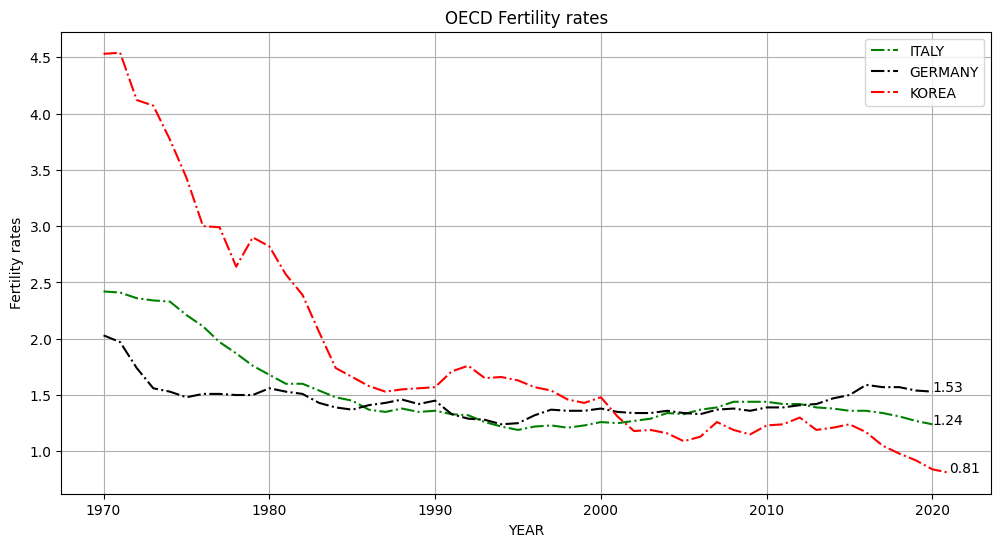

<Figure size 600x1200 with 0 Axes>

<Figure size 600x1200 with 0 Axes>

In [19]:
x1 = df_ita['TIME'].to_xarray()
x2 = df_deu['TIME'].to_xarray()
x3 = df_kor['TIME'].to_xarray()

y1=df_ita['Value'].to_xarray()
y2=df_deu['Value'].to_xarray()
y3=df_kor['Value'].to_xarray()

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 그래프 그리기
plt.plot(x1, y1, color='g', ls='dashdot', label='ITALY')
plt.plot(x2, y2, color='k', ls='dashdot', label='GERMANY')
plt.plot(x3, y3, color='r', ls='dashdot', label='KOREA')

# 그래프 타이틀, 축 레이블, 범례 추가
plt.title('OECD Fertility rates')
plt.xlabel('YEAR')
plt.ylabel('Fertility rates')
plt.legend()

# 마지막 값 표시하기
plt.text(x1[-1], y1[-1], f'{y1[-1]:.2f}')
plt.text(x2[-1], y2[-1], f'{y2[-1]:.2f}')
plt.text(x3[-1], y3[-1], f'{y3[-1]:.2f}')

# 그래프 보여주기
plt.grid()
plt.show()
plt.figure(figsize=(6, 12))